In [1]:
import os
import pandas as pd
from sklearn.datasets import fetch_openml
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline

import framework
import framework.nn as nn
from framework.utils.data import data_loader
from framework.optim import Adam, SGD
from framework.metrics import accuracy_score

### Download MNIST dataset.

In [2]:
if os.path.exists('mnist.npz'):
    with np.load('mnist.npz', 'r', allow_pickle=True) as data:
        train_data = data['X']
        test_data = data['y']
else:
    mnist = fetch_openml("mnist_784")
    train_data = mnist.data / 255.0
    test_data = mnist.target
    np.savez('mnist.npz', X=train_data, y=test_data)

One-hot encoding labels.

In [3]:
test_data = pd.get_dummies(test_data).to_numpy()

test_data, test_data.shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 (70000, 10))

Dividing our dataset into training and test samples

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, test_data, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56000, 784), (14000, 784), (56000, 10), (14000, 10))

### Create the model, select the loss function and optimizer of our neural network

We'll use cross-entropy as a loss function, it is uninformative but well suited for multiclass classification

In [5]:
epochs = 20
batch_size = 1024
lr = 1e-3
summary_every = 1

In [6]:
model = nn.Sequential(
    nn.Linear(784, 512),
    nn.BatchNorm(512),
    nn.Sigmoid(),
    
    nn.Linear(512, 256),
    nn.BatchNorm(256),
    nn.Sigmoid(),
    
    nn.Linear(256, 128),
    nn.BatchNorm(128),
    nn.Sigmoid(),
    
    nn.Linear(128, 64),
    nn.BatchNorm(64),
    nn.Sigmoid(),
    
    nn.Linear(64, 10),
    nn.SoftMax(),   
)

criterion = nn.CrossEntropyLoss()
optimizer = SGD(model)

### Training loop

Epoch: 1/20
Train loss: 2.3186215380111634
Train accuracy: 0.80875
Test accuracy: 0.8051428571428572

Epoch: 2/20
Train loss: 3.2487307680178503
Train accuracy: 0.8411071428571428
Test accuracy: 0.836

Epoch: 3/20
Train loss: 2.7296509038481678
Train accuracy: 0.87125
Test accuracy: 0.8678571428571429

Epoch: 4/20
Train loss: 1.9834434474789224
Train accuracy: 0.9079285714285714
Test accuracy: 0.9005714285714286

Epoch: 5/20
Train loss: 2.3625031318118754
Train accuracy: 0.8669642857142857
Test accuracy: 0.8611428571428571

Epoch: 6/20
Train loss: 1.5467680458142858
Train accuracy: 0.9422678571428571
Test accuracy: 0.9319285714285714

Epoch: 7/20
Train loss: 1.7213974541529458
Train accuracy: 0.9573928571428572
Test accuracy: 0.9476428571428571

Epoch: 8/20
Train loss: 0.7838013766041901
Train accuracy: 0.9591607142857143
Test accuracy: 0.9464285714285714

Epoch: 9/20
Train loss: 0.6497662675015391
Train accuracy: 0.9674285714285714
Test accuracy: 0.9547142857142857

Epoch: 10/20
Train

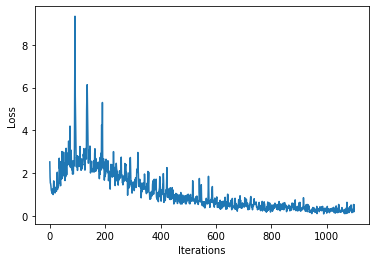

In [7]:
history = []

for epoch in range(epochs):
    for X, y in data_loader(X_train, y_train, batch_size=batch_size):
        y_pred = model.forward_pass(X)
        loss = criterion.forward_pass(y_pred, y)
    
        grad = criterion.backward_pass(y_pred, y)
        model.backward_pass(X, grad)
        
        history.append(loss)
    
        optimizer.step(lr=lr)
    
    if (epoch + 1) % summary_every == 0:
        
        model.eval()
        y_pred_test = model.forward_pass(X_test)
        y_pred_train = model.forward_pass(X_train)
        
        print(f"Epoch: {epoch + 1}/{epochs}")
        print(f"Train loss: {history[-1]}")
        print(f"Train accuracy: {accuracy_score(y_pred_train, y_train)}")
        print(f"Test accuracy: {accuracy_score(y_pred_test, y_test)}\n")
        model.train()
 
plt.plot(history)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()